# <center> Taller Keras $-$ Ejemplo 3

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras import models
from keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from pandas import DataFrame
from pandas_ml import ConfusionMatrix
from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

# Introducción a las Redes Neuronales (NNs)

__Objetivos:__
* Entender el concepto de Dropout y su importancia en Deep Learning.
* Implementar una NN con Dropout en Keras para clasificar la base de datos MNIST.

In [5]:
# cargar la interfaz a la base de datos que viene con Keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# pre-procesamiento de los datos
train_images = train_images.reshape((60000, -1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, -1))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

## Dropout

Dropout es una técnica que sirve para regularizar el entrenamiento de una red neuronal. Fue introducida por Srivastava, Hinton, Krizhevsky, Sutskever y Salakhutdinov en 2014.

Se utiliza en la práctica para reducir el sobre-entrenamiento (_overfitting_) de la red, es decir, reducir la diferencia entre el error de entrenamiento y el error de validación/prueba.

La técnica consiste en que, durante cada batch, se eliminan un cierto porcentaje de neuronas, seleccionadas aleatoriamente, de la capa donde se aplica el Dropout. Esto permite que el entrenamiento no depende fuertemente de neuronas específicas, y que los pesos se distribuyen más adecuadamente dentro de las neuronas que sobreviven al drop-out.

Al entrenar el siguiente batch, la totalidad de neuronas se repobla completamente y se hace una nueva selección aleatoria de neuronas a eliminar.

![](dropout.png)

A continuación definimeros una red neuronal de 4 capas ocultas, intercalando entre cada una, una capa de Dropout.

El parámetro en una capa Dropout es:

__rate:__ Porcentaje ($0 \leq rate < 1$) de neuronas a eliminar aleatoriamente.

Así, si se quieren eliminar el 40% de las neuronas, en Keras se agrega la capa

    layers.Dropout(rate=0.4, name='name')

__Ejercicio:__ En la siguiente red, adicione 4 capas Dropout, una después de cada capa densa oculta. Utilice una tasa de eliminación del 25% en cada una. (Asegúrese que los nombres de las capas sean distintos).

In [6]:
### START CODE HERE ### (≈ 4 lines of code)
network3 = models.Sequential()
network3.add(layers.Dense(512, activation='relu', input_shape=data_shape, name='dense1'))

network3.add(layers.Dense(512, activation='relu', name='dense2'))

network3.add(layers.Dense(256, activation='relu', name='dense3'))

network3.add(layers.Dense(128, activation='relu', name='dense4'))

network3.add(layers.Dense(10, activation='softmax', name='classifier'))
### END CODE HERE ###

In [7]:
network3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
dense2 (Dense)               (None, 512)               262656    
_________________________________________________________________
dense3 (Dense)               (None, 256)               131328    
_________________________________________________________________
dense4 (Dense)               (None, 128)               32896     
_________________________________________________________________
classifier (Dense)           (None, 10)                1290      
Total params: 830,090
Trainable params: 830,090
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt = optimizers.RMSprop(lr=0.001)
network3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\juanq\anaconda3\envs\keras\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
tic = time()
history3 = network3.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.16666)
print('total training time:', time()-tic, 'seconds')

Epoch 1/15
782/782 [==============================] - 9s 10ms/step - loss: 0.2468 - accuracy: 0.9252 - val_loss: 0.1493 - val_accuracy: 0.9565
Epoch 2/15
782/782 [==============================] - 9s 11ms/step - loss: 0.1079 - accuracy: 0.9690 - val_loss: 0.1198 - val_accuracy: 0.9679
Epoch 3/15
782/782 [==============================] - 12s 15ms/step - loss: 0.0837 - accuracy: 0.9779 - val_loss: 0.1154 - val_accuracy: 0.9723
Epoch 4/15
782/782 [==============================] - 14s 18ms/step - loss: 0.0708 - accuracy: 0.9816 - val_loss: 0.2029 - val_accuracy: 0.9629
Epoch 5/15
782/782 [==============================] - 15s 19ms/step - loss: 0.0639 - accuracy: 0.9843 - val_loss: 0.1316 - val_accuracy: 0.9748
Epoch 6/15
782/782 [==============================] - 15s 19ms/step - loss: 0.0608 - accuracy: 0.9863 - val_loss: 0.1734 - val_accuracy: 0.9725
Epoch 7/15
782/782 [==============================] - 15s 19ms/step - loss: 0.0533 - accuracy: 0.9877 - val_loss: 0.1871 - val_accuracy: 0

In [12]:
results3 = network3.evaluate(test_images, test_labels)
print('results loss:', results3[0])
print('results accuracy:', results3[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2632 - accuracy: 0.9799
results loss: 0.26316872239112854
results accuracy: 0.9799000024795532


### Ver el historial de desempeño de la red

In [13]:
history_dict = history3.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

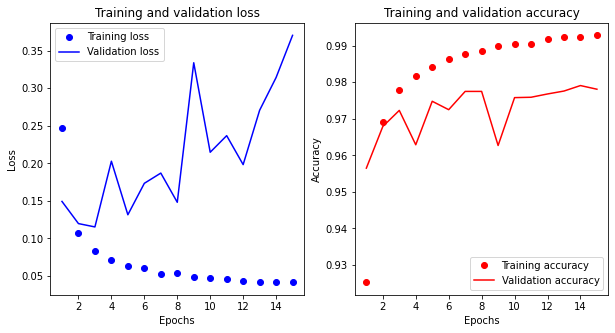

In [15]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultados

In [ ]:
pred3 = network3.predict(test_images)
predictions3 = np.argmax(pred3, 1)
test_labs = np.argmax(test_labels, 1)

In [ ]:
conf_matrix3 = ConfusionMatrix(test_labs, predictions3)
print(conf_matrix3)

In [ ]:
# plot confusion matrix
CM3 = conf_matrix3.to_array()
cf3 = DataFrame(CM3)
pretty_plot_confusion_matrix(cf3, annot=True, pred_val_axis='x', figsize=(10,10))

In [ ]:
# other plot
PlotMatrix(CM3, figsize=(10,10), cmap=plt.cm.Blues, title='Confusion Matrix')

---

---